In [64]:
import numpy as np
import matplotlib.pyplot as plt

## Create data

In [114]:
num_pred = 5
num_meas = 1000

Input variables

In [115]:
Xi = np.random.normal(size=(num_meas, num_pred))

In [116]:
X1 = np.ones(shape=(num_meas, 1))

In [117]:
X = np.hstack([X1, Xi])
X.shape

(1000, 6)

In [118]:
X[:3, :5]

array([[ 1.        , -1.33013817, -1.58688068, -0.21754615,  1.22197607],
       [ 1.        ,  0.57623821,  0.05351473, -0.3035498 ,  1.29458463],
       [ 1.        ,  1.18497971, -0.66262949,  1.23807485, -1.09109061]])

True beta

In [119]:
true_beta = np.random.normal(size=(num_pred + 1,))

In [120]:
true_beta

array([-0.72230258,  0.54159793, -0.73875426, -0.91637895,  0.68171531,
        1.13822466])

Response variable

In [121]:
y = np.dot(X, true_beta) + np.random.normal(scale=0.3, size=(num_meas, ))

## Direct solution

In [122]:
dir_solve = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, y))

In [123]:
dir_solve

array([-0.71506823,  0.55715926, -0.74619209, -0.92707714,  0.67869935,
        1.13810955])

## Gradient descent

In [124]:
est_beta = np.random.normal(size=(num_pred + 1,))

In [125]:
yhat = np.dot(X, est_beta)

In [126]:
est_delta = yhat - y

In [127]:
learning_rate = 0.1

In [128]:
error = []
for i in range(100):
    
    yhat = np.dot(X, est_beta)
    
    delta = yhat - y
    
    est_beta -= learning_rate * np.dot(X.T, delta) / num_meas
    
    error.append(np.dot(delta.T, delta) / num_meas)

In [129]:
y[:5]

array([ 0.57484705,  0.27349572, -1.08555691, -2.12547335,  2.9122932 ])

In [130]:
yhat[:5]

array([ 0.87966563,  0.26906293, -0.99075506, -1.81061494,  2.47923384])

In [134]:
est_beta

array([-0.71507326,  0.55715934, -0.74613219, -0.92704704,  0.67867652,
        1.13808976])

In [135]:
true_beta

array([-0.72230258,  0.54159793, -0.73875426, -0.91637895,  0.68171531,
        1.13822466])

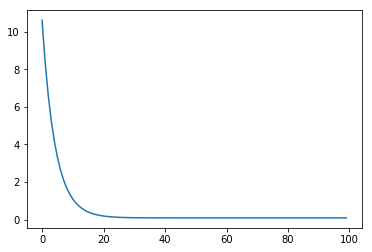

In [131]:
plt.figure()
plt.plot(error)
plt.show()

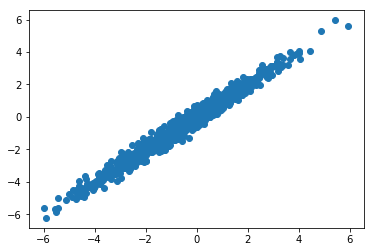

In [132]:
plt.figure()
plt.scatter(yhat, y)
plt.show()

## Ridge regression

In [136]:
np.eye(2)

array([[ 1.,  0.],
       [ 0.,  1.]])